<h1><center>Practice of Large Scale Machine Learning - TP1 Avazu<center></h1>
<h2><center>IA317 DEADLINE 20/12/2019<center></h2>


#Introduction

In online advertising, click-through rate (CTR) is a very important metric for evaluating ad performance. As a result, click prediction systems are essential and widely used for sponsored search and real-time bidding. The goal of this TP is to build and test prediction models on 11 days of Avazu data.

#### For any remark or suggestion, please feel free to contact us at: 
#### pascal.bianchi@telecom-paris.fr
#### nidham.gazagnadou@telecom-paris.fr
#### kevin.elgui@telecom-paris.fr

In [2]:
import sys
import os
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/tp_avazu/'  # your new root path

sys.path.append(os.path.join(root_path, 'notebooks')) # for importing from utils.py

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<font color="red">**Question:**
    Import the needed packages: numpy, pandas etc..
</font>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [0]:
## Try to run de cell
from utils import plotlift

# The dataset

<font color="red">**Question:**
    Load the data *'data_tp/train-1000000'* into a pandas DataFrame. Use the function 'os.path.join()' to indicate the full path. Then, display the first lines with the ".head()" method.
    <br>
</font>
**Remark**: the features meaning is available at https://www.kaggle.com/c/avazu-ctr-prediction/data

In [0]:
full_path = os.path.join(root_path,"data/train-1000000")
df = pd.read_csv(full_path)

In [6]:
df.head() # Fill here

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3.983206e+18,0,14102915,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,fb6566d3,be87996b,1,2,4687,320,50,423,2,39,100148,32
1,7.756884e+18,0,14103007,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,07d7df22,9b7af851,ac5a4a77,7e6190f3,0,0,17894,320,50,2039,2,39,100077,32
2,6.941774e+17,0,14102711,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,a99f214a,748e298a,3c55fad5,1,0,22684,320,50,2619,1,163,100055,71
3,2.664154e+18,1,14102903,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,0f2161f8,a99f214a,a50da3d4,c5cc73c1,1,0,23222,320,50,2676,0,35,100176,221
4,1.480510e+19,0,14102902,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,d5f88679,a5bce124,1,0,8330,320,50,761,3,175,100081,23


<font color="red">**Question:**
    What is the 'click' frequency in the dataset?
    <br>
    Hint: 'click' is a binary output (0 or 1)
</font>

In [7]:
(df['click']==1).sum()/len(df) # Fill here

0.169971

#Your answer here

The click frequency in the dataet is *0.169971*

We note that the Avazu dataset is very unbalanced. The 'click' class represents less than a fifth of the whole database. We already know that a classifier always predicting 'click'=0 will have good preformances in terms of error rate (around 0.17). The ROC and lift curves will be better performance metrics.

<font color="red">**Question:**
    What are the categorical features? Using the 'df.nunique()' method, compute the number of distincts values for each of these features.
</font>

In [8]:
#FROM THE INPUT DF HOW TO CHECK A FEATURE HAVE CATEGORICAL DT SINCE IT MAY ALSO BE INT LIKE C1,C2,C3 ect.... -> all features where the total number of distinct values os different from
#the length of the DF are categorical features.
# Fill here
unique_features = df.nunique(axis=0) 
total_features = 0
for column_name, values in df.items():
  total_features +=1
  if unique_features[column_name] != len(df):
   total_features += unique_features[column_name]
   print("the number of distinct values of {}".format(column_name,),"is {}".format(unique_features[column_name]))
#df.nunique(axis=0)  


the number of distinct values of click is 2
the number of distinct values of hour is 240
the number of distinct values of C1 is 7
the number of distinct values of banner_pos is 7
the number of distinct values of site_id is 2651
the number of distinct values of site_domain is 2871
the number of distinct values of site_category is 22
the number of distinct values of app_id is 3157
the number of distinct values of app_domain is 198
the number of distinct values of app_category is 26
the number of distinct values of device_id is 150501
the number of distinct values of device_ip is 555248
the number of distinct values of device_model is 5168
the number of distinct values of device_type is 5
the number of distinct values of device_conn_type is 4
the number of distinct values of C14 is 2243
the number of distinct values of C15 is 8
the number of distinct values of C16 is 9
the number of distinct values of C17 is 420
the number of distinct values of C18 is 4
the number of distinct values of C1

#Your answer here

The categorical features are :
* **site_id** number of distinct values **2651**

* **site_domain** number of distinct values **2871**

* **site_category** number of distinct values **22**

* **app_id** number of distinct values **3157**

* **app_domain** number of distinct values **198**

* **app_category** number of distinct values **26**

* **device_id** number of distinct values **150501**

* **device_ip** number of distinct values **555248**

* **device_model** number of distinct values **5168**

* **C1** number of distinct values  **7**

* **C14** number of distinct values  **2243**

* **C15** number of distinct values **8**

* **C16** number of distinct values  **9**

* **C17** number of distict values  **420**

* **C18** number of distinct values ** 4**

* **C19**number of distinct values   **66**

* **C20** number of distinct values **163**

* **C21** number of distinct values **60**

<font color="red">**Question:**
    If one does a dummy encoding of all categorical variables, what would be the dimension of the model?
    In other words: what would be the dimension of our big feature vector encoded with dummies. 
    <br>
    Hint: if you have just 1 feature with 3 categories A, B and C, you would have a vector of dimension 3 (or 2 if you use drop_first=True).
</font>

In [9]:
#df.nunique().values
print("The total size of the feature vector is {}".format(total_features))

The total size of the feature vector is 723104


#Your answer here

Te total size of the feature vector is **723104**

<font color="red">**Question:**
    Analyze the 'hour' column: which format is used? How can we transform/simply this feature?
</font>

In [10]:
print(df["hour"].head()) # Fill here
print(df["hour"].tail()) # Fill here

0    14102915
1    14103007
2    14102711
3    14102903
4    14102902
Name: hour, dtype: int64
999995    14102602
999996    14102101
999997    14102318
999998    14102908
999999    14102600
Name: hour, dtype: int64


#Your answer here

The hour column is composed by a date where (YYMMDDHH):

+ The fisrt carachters represent the last 2 digit of the year(YY)

+ The next 2 represent the month(MM)

+ the next 2 represent the day(DD)

+ the last represent the hour(DD)

This could be easily understood from the function datesplit defined below.

<font color="red">**Question:**
    Run and understand the following script.
</font>

In [11]:
import datetime

def datesplit(originalDate):
    originalDate = str(originalDate)
    
    year = int("20" + originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])
    
    return datetime.datetime(year, month, day, hour)

# Exemple :
datesplit(14102915).weekday(), datesplit(14102915).hour

(2, 15)

<font color="red">**Question:**
    Using the ".apply( ... )" method, create a 'weekday' for the day of the week. Then, replace the 'hour' column by the hour.
</font>

To answer this question you have to understand that applies takes a function as argument
<br>
"lambda x: ... " is used to create local unamed function of x
<br>
Check the documentation: https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions

In [0]:
df['weekday'] = df['hour'].apply(lambda x: datesplit(x).weekday() ) # Fill here
df['hour'] = df['hour'].apply(lambda x: datesplit(x).hour) # Fill here

<font color="red">**Question:**
    Using the ".groupby( ... )" method, visualize the influence of the hour and of the day on the 'click' frequency (take the ".mean()"!). To do so, plot 'click' vs 'hour' and 'click' vs 'weekday' curves.
    <br>
    Precise the name of the axes.
</font>

In [13]:
print(df.groupby(["hour"]).mean()["click"]) # Fill here for the influence of the hour
print(df.groupby("weekday").mean()["click"]) # Fill here for the influence of the day

hour
0     0.182707
1     0.185734
2     0.175552
3     0.175367
4     0.159664
5     0.162126
6     0.169315
7     0.177490
8     0.163418
9     0.159042
10    0.162613
11    0.171025
12    0.171659
13    0.168032
14    0.178075
15    0.183737
16    0.180076
17    0.173271
18    0.164072
19    0.165725
20    0.158402
21    0.162384
22    0.166847
23    0.170733
Name: click, dtype: float64
weekday
0    0.183143
1    0.161577
2    0.158675
3    0.173795
4    0.173392
5    0.183995
6    0.183105
Name: click, dtype: float64


Text(0, 0.5, 'CLICK RATE')

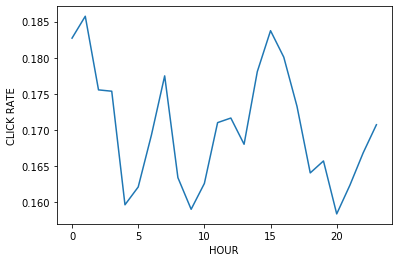

In [14]:
plt.plot(df.groupby("hour").mean()["click"]); # Fill here for the influence of the hour
plt.xlabel("HOUR")
plt.ylabel("CLICK RATE")

Text(0, 0.5, 'CLICK RATE')

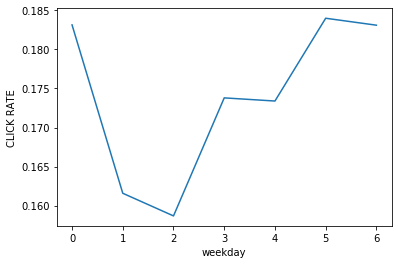

In [15]:
plt.plot(df.groupby("weekday").mean()["click"]); # Fill here for the influence of the day
plt.xlabel("weekday")
plt.ylabel("CLICK RATE")

# Preliminary work and first model

Start by understanding the features with few modalities:
'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.

<font color="red">**Question:**
    For instance, inspect the columns 'C15' (dimension of the advert) and 'site_category': visualize the clicks mean.
</font>

Text(0, 0.5, 'CLICK RATE')

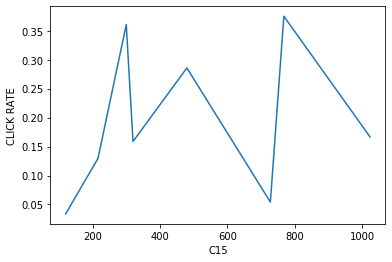

In [16]:
plt.plot(df.groupby("C15").mean()["click"]); # Fill here: inspect 'C15' using '.groupby'
plt.xlabel("C15")
plt.ylabel("CLICK RATE")

Text(0, 0.5, 'CLICK RATE')

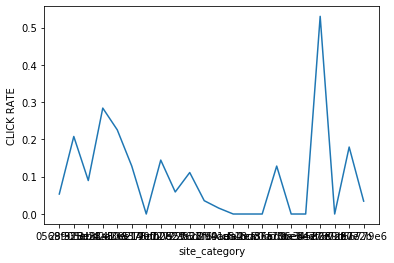

In [17]:
plt.plot(df.groupby("site_category").mean()["click"]); # Fill here: inspect 'site_category' using '.groupby'
plt.xlabel("site_category")
plt.ylabel("CLICK RATE")

<font color="red">**Question:**
    Some site categories have a null click rate. Why? Display the 'count()' of each modality.
    <br><br>
    Hint: you can use the method ".value_counts()"
</font>

In [18]:
# is the question well understood??
df.site_category.value_counts() # Fill here

50e219e0    408921
f028772b    313339
28905ebd    182020
3e814130     75667
f66779e6      6365
75fa27f6      4007
335d28a8      3351
76b2941d      2573
c0dd3be3      1026
72722551       676
dedf689d       624
70fb0e29       608
0569f928       429
8fd0aea4       189
a818d37a        81
42a36e14        62
e787de0e        28
bcf865d9        16
5378d028        11
9ccfa2ea         5
da34532e         1
c706e647         1
Name: site_category, dtype: int64

It is practical to visualize both columns in parallel:

In [19]:
col = 'C1'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'count']
a.sort_values(by='count', ascending=False)

,mean,count
C1,,
1005,0.169474,918606.0
1002,0.211157,54907.0
1010,0.095497,22409.0
1012,0.177295,2854.0
1007,0.035591,871.0
1001,0.027027,222.0
1008,0.106870,131.0


#Your answer here

Some sites have a null click rate because they have never been clicked.

<font color="red">**Question:**
    Divide the dataset into a training and test set with sklearn (use the following options: test_size=0.1, random_state=100).
    <br>
    Warning: do not use 'id' as a feature.
</font>

In [0]:
from sklearn.model_selection import train_test_split
df.head()
Y = df["click"].values
df.drop(["id","click"],axis = 1)
X = df.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X,Y,test_size = 0.1,random_state = 100)

# First work on a reduced number of features

<font color="red">**Question:**
    Put in a list the selected columns: 'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.
</font>

In [21]:
some_columns = ['hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 
                'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21']

#to be removed because we need the datframe later on!!
#get the list of columns to be removed from the dataframe.                
to_be_removed = df.drop(columns=some_columns,axis=1).columns
df = df.drop(columns=to_be_removed,axis=1)

#we need to redefine Xtrain/Xtest because the features have changed.
X = df.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X,Y,test_size = 0.1,random_state = 100)
df.head()    

,hour,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C15,C16,C18,C21,weekday
0,15,1005,1,f028772b,07d7df22,1,2,320,50,2,32,2
1,7,1002,0,50e219e0,07d7df22,0,0,320,50,2,32,3
2,11,1005,0,50e219e0,cef3e649,1,0,320,50,1,71,0
3,3,1005,0,50e219e0,0f2161f8,1,0,320,50,0,221,2
4,2,1005,1,f028772b,07d7df22,1,0,320,50,3,23,2


<font color="red"> - Importer CategoricalEncoder de sklearn.preprocessing.  
- Fitter le CategoricalEncoder sur les données de train restreintes aux colonnes ci-dessus.  
- Transformer les données de train et de test en dummies.
</font>

<font color="red">**Question:**
    <br>
    - Import OneHotEncoder from sklearn.preprocessing
    <br>
    - Transform the training and the test data restricted to the selected columns
</font>

NB: After applying fit_transform tothe data, we obtained a new dataframe wehre each categorical feature is transformed (using fit) and then the dataframe is also transformed (using trasnform)

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Xtrain_oh = ohe.fit_transform(Xtrain) # fit the transformation of Xtrain restricted to selected columns

#we do not need to do the fit here again because it's already previously, so the ohe object will use the previuosly defined encoding to transfrom Xtest
Xtest_oh = ohe.transform(Xtest)# and transform Xtest restricted to selected columns

<font color="red">**Question:**
    What is the new number of features?
</font>

In [23]:

print("the new  number of features is {}".format(len(Xtrain_oh[ 1,:].toarray()[0])))

the new  number of features is 183


Your answer here

the new  number of features is **183**

<font color="red">**Question:**
    Visualize the first row of the design matrix you have got. Do not forget to convert it into a "numpy.array" using the method ".toarray()".
</font>

In [24]:
Xtrain_oh[1,:].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0.]])

<font color="red">**Question:**
    Import and fit a logistic regression model on your the encoded data.
</font>

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e15)
lr.fit(Xtrain_oh,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<font color="red">**Question:**
    With '.predict' and 'predict_proba', display the hard and soft decision you get on test data.
</font>

In [0]:
hard = lr.predict(Xtest_oh)
soft = lr.predict_proba(Xtest_oh)

<font color="red">**Question:**
    Compute the probability of error using sklearn.metrics 'accuracy_score' function. Comment.
</font>

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,hard) # Fill here
print("the probability of error is : {}".format(1-accuracy))

the probability of error is : 0.16957999999999995


Your answer here

the probability of error is : **0.16957999999999995**

<font color="red">**Question:**
    Plot the ROC curve. Then compute the log loss and the Area Under the Curve ROC.
</font>

NB: soft contains 2 columns which corrspond to the probability of the 2 classes (0 or 1), but in our case we want to work with the probability to belong to 1 so we use the second column.

[0.00000000e+00 1.20483379e-05 2.40966759e-05 ... 9.99903613e-01
 9.99927710e-01 1.00000000e+00] [0.00000000e+00 0.00000000e+00 5.88200694e-05 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


Text(0.5, 1.0, 'ROC curve')

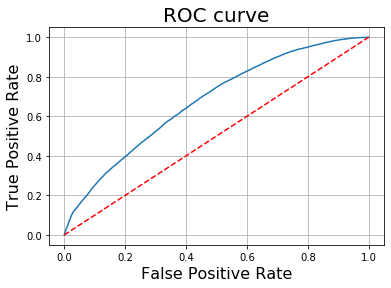

In [28]:
from sklearn.metrics import roc_curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(ytest,soft[:,1])
print(false_pos_rate,true_pos_rate)
plt.plot(false_pos_rate,true_pos_rate)

plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=20)

In [29]:
from sklearn.metrics import log_loss , roc_auc_score

log_loss(ytest,soft[:,1]), roc_auc_score(ytest,soft[:,1])

(0.4251151549501186, 0.676316794307507)

<font color="red">**Question:**
    Import the 'plot_lift' function from 'utils.py' and plot the lift curve. What is the lift of the first fifth of the population identified by the test?
</font>

(100000,) [0.75803115 0.24196885] (100000,)


[]

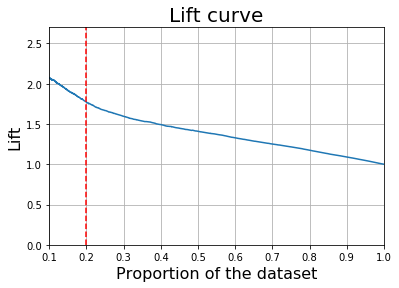

In [30]:
from utils import plotlift
print(ytest.shape,soft[0],hard.shape)
plotlift(y_true=ytest,soft_pred= soft[:,1])
# The following line just plots a vertical line for you to answer the second part of the question
plt.axvline(x= 1/5 , linestyle='--', color='r') # Fill here

plt.xlabel('Proportion of the dataset', fontsize=16)
plt.ylabel('Lift', fontsize=16)
plt.title('Lift curve', fontsize=20)
plt.plot()

Your answer here

the lift is **0.2**

# Complete model

As an example, we now focus on the 'site_id' column.

<font color="red">**Question:**
    <br>
    - For each modality, compute the number of occurrences in the dataset and the average of clicks for this modality 
    <br>
    - With 'sns.joiplot', represent the set of points (count, mean) for each modality
</font>

In [0]:
import seaborn as sns

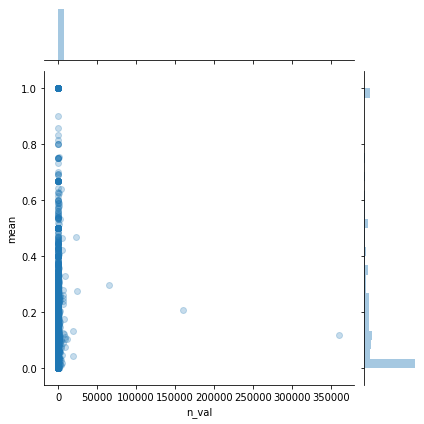

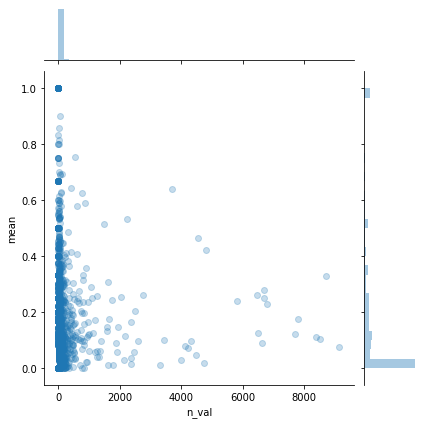

In [32]:
#to be removed!!
df = pd.read_csv(full_path)
col = 'site_id'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'n_val']
sns.jointplot(a['n_val'], a['mean'], alpha=0.25);
thres = 10000
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

<font color="red">**Question:**
    In the above commands, what does the alpha parameter stand for?
</font>

#Your answer here

The alpha parameter is used to change the opacity of the points. 

Several sites with a lot of occurrences in the dataset have a click frequency very different from the mean. It is relevant to keep the column 'site_id' at least for the modalities for which 'count' is very high.

<font color="red">**Question:**
    Do the same work on the 'device_id' column. What do you notice? What could be the isolated point?
</font>

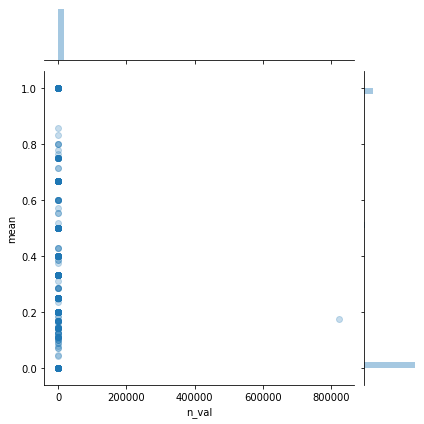

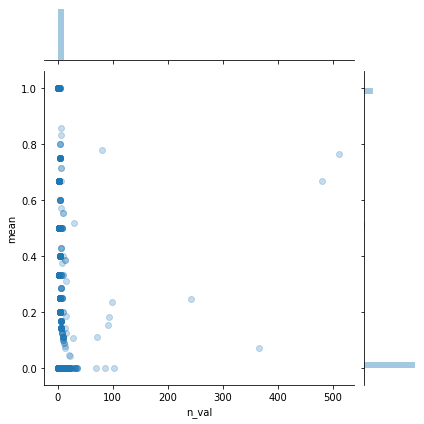

In [33]:
col = "device_id" # Fill here
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'n_val']
sns.jointplot(a['n_val'], a['mean'], alpha=0.25);
thres = 10000
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

#NB: the graph contains for each group od device_id on x: the number of occurences , on y: the CTR 

#Your answer here

we can notice that for the device_id feature points are less dense!!

the isolated point is 800000 with CTR = 0.2

<font color="red">**Question**:   
    In the column df['device_id'], spot the value V corresponding to the largest number of 'count' (using '.value_counts' method). Create a new column df['user'] defined as follows:
</font>
$$
\text{user} = \left\{\begin{array}[h]{ll} \text{device_ip + device_model} & \text{if device_id = V}\\ \text{device_id} & \text{else.}\end{array}\right.
$$

In [0]:
V = df["device_id"].value_counts().max() # Fill here
df['user'] = (df['device_ip'] + df['device_model']) * (df['device_id']==V) + df['device_id'] * (df['device_id']!=V)

<font color="red">**Question**:
    Drop the following columns: 'device_id', 'device_model' and 'device_ip'
</font>

In [35]:
df.drop(['device_id','device_model','device_ip'], axis = 1)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,user
0,3.983206e+18,0,14102915,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,1,2,4687,320,50,423,2,39,100148,32,a99f214a
1,7.756884e+18,0,14103007,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,07d7df22,0,0,17894,320,50,2039,2,39,100077,32,9b7af851
2,6.941774e+17,0,14102711,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,1,0,22684,320,50,2619,1,163,100055,71,a99f214a
3,2.664154e+18,1,14102903,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,0f2161f8,1,0,23222,320,50,2676,0,35,100176,221,a99f214a
4,1.480510e+19,0,14102902,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,07d7df22,1,0,8330,320,50,761,3,175,100081,23,a99f214a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.160473e+19,0,14102602,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,1,0,19016,300,250,2162,2,39,-1,33,a99f214a
999996,2.530099e+18,1,14102101,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,1,0,15701,320,50,1722,0,35,-1,79,a99f214a
999997,8.916528e+18,0,14102318,1005,1,f61eaaae,6b59f079,f028772b,ecad2386,7801e8d9,07d7df22,1,0,16615,320,50,1863,3,39,-1,23,a99f214a
999998,1.307924e+19,0,14102908,1005,1,57ef2c87,bd6d812f,f028772b,ecad2386,7801e8d9,07d7df22,1,0,19772,320,50,2227,0,935,-1,48,a99f214a


<font color="red">**Question**:
    One could look at the similarity between 'site_id' and 'site_domain'. Merge those columns into a new 'site' column (using the '+' operator)  and delete the old 'site_id' and 'site_domain' columns.
</font>

In [36]:
df["site"] = df["site_id"] + df["site_domain"]
df.drop(['site_id',"site_domain"], axis = 1)

,id,click,hour,C1,banner_pos,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,user,site
0,3.983206e+18,0,14102915,1005,1,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,fb6566d3,be87996b,1,2,4687,320,50,423,2,39,100148,32,a99f214a,e151e2457e091613
1,7.756884e+18,0,14103007,1002,0,50e219e0,ecad2386,7801e8d9,07d7df22,9b7af851,ac5a4a77,7e6190f3,0,0,17894,320,50,2039,2,39,100077,32,9b7af851,cb809abf74acf31a
2,6.941774e+17,0,14102711,1005,0,50e219e0,e9739828,df32afa9,cef3e649,a99f214a,748e298a,3c55fad5,1,0,22684,320,50,2619,1,163,100055,71,a99f214a,85f751fdc4e18dd6
3,2.664154e+18,1,14102903,1005,0,50e219e0,a5184c22,b8d325c3,0f2161f8,a99f214a,a50da3d4,c5cc73c1,1,0,23222,320,50,2676,0,35,100176,221,a99f214a,85f751fdc4e18dd6
4,1.480510e+19,0,14102902,1005,1,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,d5f88679,a5bce124,1,0,8330,320,50,761,3,175,100081,23,a99f214a,791b5571fd13bc73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.160473e+19,0,14102602,1005,0,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,9a8dbe7f,68dabce1,1,0,19016,300,250,2162,2,39,-1,33,a99f214a,5b08c53b7687a86e
999996,2.530099e+18,1,14102101,1005,0,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,3b6f9f67,c6263d8a,1,0,15701,320,50,1722,0,35,-1,79,a99f214a,1fbe01fef3845767
999997,8.916528e+18,0,14102318,1005,1,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,2348915f,744ae245,1,0,16615,320,50,1863,3,39,-1,23,a99f214a,f61eaaae6b59f079
999998,1.307924e+19,0,14102908,1005,1,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,3ca7f719,3e7932d7,1,0,19772,320,50,2227,0,935,-1,48,a99f214a,57ef2c87bd6d812f


<font color="red">**Question**:
    Once again, split the modified DataFrame 'df' into a train and a test set (with options: test_size=0.1 and random_state=100).
    <br>
    Warning: do not use 'id' as a feature.
</font>

In [37]:
df.drop("id",axis = 1)

Y = df.click.values
X = df.drop("click", axis = 1).values
Xtrain, Xtest, ytrain, ytest =  train_test_split(X,Y,test_size = 0.1, random_state = 100)
df["user"]

0         a99f214a
1         9b7af851
2         a99f214a
3         a99f214a
4         a99f214a
            ...   
999995    a99f214a
999996    a99f214a
999997    a99f214a
999998    a99f214a
999999    572e7feb
Name: user, Length: 1000000, dtype: object

<font color="red">**Question**:
    Define a OneHotEncoder and then, 'fit_transform' the train set.
</font>

In [0]:
ohe = OneHotEncoder(handle_unknown= "ignore")
Xtrain_oh =ohe.fit_transform(Xtrain) # Fill here

<font color="red">**Question**:
    Transform the test set. If an error occurs, analyze it and try to solve it by modifying the parameter "handle_unkown" of the OneHotEncoder. 
    <br>
    Explain your the problem you encouter and how you solved it. 
</font>

In [0]:

Xtest_oh = ohe.transform(Xtest) # Fill here

Your answer here

during the transfrom of the test set, i got an error because some categorical features where unknown and the parameter *handle_unknow* in the definition of the ohe had as default values "error". so i solved the problem by simply setting it to "ignore"!!

<font color="red">**Question**:
    What is the new number of features?
</font>

In [40]:
print(len(Xtrain_oh[1,:].toarray()[0]))

1705485


Your answer here

The new number of features is **1705485**

<font color="red">**Question**:
    How many modalities have been seen more than a 100 times?
</font>

In [41]:
# The following 'n_ones' vector below gives the number of '1' in each column/modality of the Xtrain_oh design matrix.
n_ones = np.array(Xtrain_oh.sum(axis=0))
print(len(n_ones[0]))
more_than_100 = n_ones[n_ones > 100] # Fill here using 'n_ones'
print("The total number of column/modality which appear more 100 time sin the design matrix is",len(more_than_100))

1705485
The total number of column/modality which appear more 100 time sin the design matrix is 3708


Your answer here

The total number of column/modality which appear more 100 time sin the design matrix is **3708**

The list 'cols_to_keep' below is used to store the indices of the modalities seen more than a 100 times. 

<font color="red">**Question**:
    How does the `enumerate` function work?
</font>

In [42]:
useful = np.array(n_ones>100)[0] # this is different from more_than_100 = n_ones[n_ones > 100] because the dirst contanìins an array of boolean while the second of integer

#cols_to_keep contains the index of all the columns to keep.
cols_to_keep = [i for i,b in enumerate(useful) if b]
cols_to_delete = [index for index,value in enumerate(useful) if not value]
print(type(Xtrain_oh))


<class 'scipy.sparse.csr.csr_matrix'>


Your answer here

**enumarate** is a python built in function that allows us to iterate over a list of elemtn and have an automatic counter. Moreover, it has an optiional parameter that allows to specify where the start the index.

eg : 

    for counter, el in enumarete(["el1", "el2", "el3"],1) :
       print(counter,el)

  will output : 

    1 el1

    2 el2

    3 el3  

<font color="red">**Question**:
    Using only our restriction on the 'cols_to_keep' columns, retrain a logistic regression model and compare its performance in terms of 'log_loss' and 'roc_auc_curve'.
</font>

In [43]:
#since cols_to_keep contains the index in the design matrix of the columns to keep, this opeation will filter out the ones that we do not want to keep.
Xtrain_oh = Xtrain_oh[:,cols_to_keep]
Xtest_oh = Xtest_oh[:,cols_to_keep]
print(Xtrain_oh.shape)
lr = LogisticRegression(C=1e15)
lr.fit(Xtrain_oh,ytrain)
soft = lr.predict_proba(Xtest_oh)
hard = lr.predict(Xtest_oh)

(900000, 3708)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
loss = log_loss(ytest,soft[:,1])
area =roc_auc_score(ytest,soft[:,1]) 

print(loss,area)

0.3986942560697941 0.7445844168483858


# Gradient Boosting Decision Trees

<font color="red">**Question**:
    <br>
    - Import GradientBoostingClassifier from scikit learn. 
    <br>
    - Initialize it using 50 estimators and a learning rate of 0.8. Set 'verbose=True' to monitor the progress of the training step.
    <br>
    - Fit it on the same columns 'cols_to_keep' of Xtrain_oh than for the previous logistic regression.
    <br>
    - Evaluate its performance as in the previous step.
</font>

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate = 0.8,verbose = 1,n_estimators = 50) # Fill here

In [46]:
gb.fit(Xtrain_oh,ytrain)

      Iter       Train Loss   Remaining Time 
         1           0.8743            7.23m
         2           0.8639            6.83m
         3           0.8574            6.84m
         4           0.8524            6.72m
         5           0.8491            6.43m
         6           0.8450            6.15m
         7           0.8432            6.13m
         8           0.8417            5.86m
         9           0.8398            5.66m
        10           0.8374            5.39m
        20           0.8271            3.77m
        30           0.8212            2.50m
        40           0.8173            1.24m
        50           0.8134            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.8, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [47]:
soft = gb.predict(Xtest_oh)
log_loss(ytest, soft), roc_auc_score(ytest, soft)

(5.763149088794323, 0.5351757001693583)

<font color="red">**Question**:
    What does the 'gb.estimators_' output?
</font>

In [48]:
print(gb.estimators_.shape)

(50, 1)


#Your answer here

The gb.estimators_ output the list of decision trees that have been built after fitting the gradient boost estimator with data.

We now try to use the 'gb' classifier to generate features that will be relevant inputs for the logistic regression.

<font color="red">**Question**:
    With the 'gb.apply()' method, generate a transformation 'leafs_train' of the training set 'Xtrain_oh[:, cols_to_keep]' for which the n-th column corresponds to the number of the leaf returned by the estimator n.
</font>

gb.apply(self,X): 

* X : {array-like, sparse matrix}, shape (n_samples, n_features) is the input array.

* returns X_leaves : array-like, shape (n_samples, n_estimators, n_classes), where nclasses = 1 in the case of a binary classification problem.

In [0]:
# Test here the gb.apply method on Xtrain[:, cols_to_keep]
#Xtrain_o is already of the because it has been sliced previously!!
leafs_train = gb.apply(Xtrain_oh)[:,:,0]
leafs_test = gb.apply(Xtest_oh)[:,:,0]

After your applied gb.apply on Xtrain_oh[:, cols_to_keep], remember that we have only one class to predict (click = 0 or 1). So, do not forget to slice your output with [:, :, 0] in order to keep, firstly, all the samples, and secondly all your 50 estimators.

Hint: you can have a look at the dimensions of your output with .shape !

In [50]:
leafs_train = pd.DataFrame(leafs_train) # Fill here
leafs_test = pd.DataFrame(leafs_test)
leafs_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,7.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,10.0,3.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,13.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,10.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


<font color="red">**Question**:
    Encode these new features into dummies.
</font>

In [0]:
ohe = OneHotEncoder(handle_unknown="ignore") # Fill here an argument if needed
leafs_train_oh = ohe.fit_transform(leafs_train)
leafs_test_oh = ohe.transform(leafs_test)

<font color="red">**Question**:
    With the "hstack" function, create a new matrix of features by concatenating horizontally our new features "leafs_train_oh" and "leafs_test_oh", and previous features used for logistic regression (e.g. in "Xtrain_oh[:, cols_to_keep]").
</font>
<br><br>
**Remark**: we use "hstack" from scipy.sparse (and not from numpy) because the output of our OneHotEncoder is a sparse array. You can verify it with the command "type(Xtrain_oh)".

In [0]:
from scipy.sparse import csr_matrix, hstack

Xtrain_concat = hstack([Xtrain_oh,leafs_train]) # Fill here
Xtest_concat = hstack([Xtest_oh,leafs_test])

<font color="red">**Question**:
    Run a logistic regression on the new features and evaluate its performance as before. 
    <br>
    Warning: be patient, fitting should take about 5 minutes on Google Colab.
</font>

In [53]:
lr = LogisticRegression(C=1e15)
lr.fit(Xtrain_concat,ytrain)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
#MODEL EVALUATION
soft = lr.predict_proba(Xtest_concat)
area =  roc_auc_score(ytest,soft[:,1])
loss = log_loss(ytest,soft[:,1])
print(loss,area)

0.3981537900341594 0.7457658066637322


We can notice how the performance of the lr is similar to the one of the revious lr wiht a subset of features!! 

<font color="red">**Question**:
    <br>
    - Import XGBClassifier from xgboost package.
    <br>
    - Initialize it using the same number of estimators and learning rate as before. Set the 'n_jobs' to -1.
    <br>
    - Fit it on the same columns 'cols_to_keep' of Xtrain_oh than for the previous logistic regression.
    <br>
    - Evaluate its performance and compare it to the GradientBoosting classifier of scikit learn. How is the error? Does it take more time to run?
</font>

In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.8,n_estimators=100,n_jobs=-1,verbosity =2)
%time xgb.fit(Xtrain_oh,ytrain)

[16:00:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:00:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:00:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:00:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:00:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:00:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[16:00:53] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[16:00:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.8, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)

In [56]:
#EVALUATION OF THE PERFORMANCE
soft = xgb.predict_proba(Xtest_oh)
print(soft.shape)
loss = log_loss(Xtest_oh,soft[:,1])
accuracy = accuracy_score(ytest,soft[:,1])
area = roc_auc_score(ytest,soft[:,1])

print("accuracy :",accuracy, "roc area :" , area,"loss_log" , loss)

(100000, 2)


ValueError: ignored

<font color="red">**Question**:
    Increase the number of estimators and visualize the impact on performance. You might have to adapt the learning rate. On Google Colab, here are the approximate training times<br> 
    - nb_estimators=256  and lr=0.8 ~  4 min<br>
    - nb_estimators=512  and lr=0.6 ~  8 min<br>
    - nb_estimators=1024 and lr=0.5 ~ 16 min
</font>

In [0]:
xgb = XGBClassifier(n_estimators=512,verbosity=2 ,learning_rate=0.8,n_jobs=-1 )

xgb.fit(Xtrain_oh,ytrain)

In [0]:
#EVALUATION OF THE PERFORMANCE
soft = xgb.predict(Xtest_oh)
print(soft.shape)
loss = log_loss(Xtest_oh,soft[:,1])
accuracy = accuracy_score(ytest,soft[:,1])
area = roc_auc_score(ytest,soft[:,1])

print("accuracy :",accuracy, "roc area :" , area,"loss_log" , loss)

# Features hashing and random forest

We restart with raw features before dummy encoding: Xtrain, Xtest.

<font color="red">**Question**:
    Display again the number of modalities per feature in Xtrain. Use '.nunique()'
</font>

In [0]:
# Fill here
df = pd.read_csv(full_path)
print(df.nunique())
y = df["click"].values
df = df.drop(labels=["id","click"],axis=1)
#X = df.values
Xtrain,Xtest,ytrain,ytest = train_test_split(df,y,test_size = 0.1,random_state =100)

We want to define a transformation which regroups the least frequent modalities into a label 'isRare'. In order to do so, we decide to define our own Transformer.

<font color="red">**Question**:
    Understand the different steps of 'fit' and 'transform'.
</font>

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

#In genral, this class takes an input and transform each column either into the value contains in the column if the value is frequent, or into rare if the value is not frequent. 
class MergeRareTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, col_names, threshold):
        self.col_names = col_names
        self.threshold = threshold

    def fit(self, X, y=None):

        X = pd.DataFrame(X)
        counts_dict_list = []
        ################## READ THIS #########################
        for i in range(len(self.col_names)):
            
            serie = X[self.col_names[i]].value_counts()  # Série des counts de chaque modalité
            rare_indexes = serie[serie<self.threshold[i]].index  # A quoi correspondent ces indices ?
            #they correspond to the rare indexes for column i according to the threshold fixed in column i NB: indexes are actual value in column i
            frequent_indexes = serie[serie >= self.threshold[i]].index  # A quoi correspondent ces indices ?
            #they correspond to the frequent index for column i according to the threshold fixedin column i
            dico = {x:'isRare' for x in rare_indexes}
            dico.update({x: str(x) for x in frequent_indexes})
            counts_dict_list.append(dico)   # Quel est le dictionnaire obtenu ?
            #a dictionay contains all the values for the column i as key, and as value either isRare or the key according to idf the key is frequent or not.
            
        ######################################################
            
        self.counts_dict_list_ = counts_dict_list
        return self

    def transform(self, X):

        Xt = pd.DataFrame()
        ################## READ THIS #########################
        for col, count_dict in zip(self.col_names, self.counts_dict_list_):
            Xt[col] = X[col].apply(lambda x:count_dict[x] if x in count_dict else 'isRare')
            # A quoi sert le "else 'isRare'" dans la transformation de la colonne ?
            #il est utile si lors de la transfromation d'une colonne,on recontre un element qui n'as pas ete rencontré lors de la fit
        ######################################################

        return Xt       


<font color="red">**Question:**
    <br>
    - Fit and transform the training set. To do so, merge all mmodalities occuring at least 20 times in each column.
    <br>
    - Transform the test set.
</font>

In [0]:
mg = MergeRareTransformer(col_names=Xtrain.columns, threshold=[20]*len(Xtrain.columns))
Xtrain_mg = mg.fit_transform(Xtrain) # Fill here with fit_transform
Xtest_mg = mg.transform(Xtest)

<font color="red">**Question:**
   How many elements of the column Xtrain_mg['app_domain'] are now labeled as 'rare'? Use the '.value_counts()' method.
</font>

In [0]:
# Fill here
Xtrain_mg["app_domain"].value_counts()
#the answer is 513

<font color="red">**Question:**
   In the new train set, display the number of modalities for each feature.
</font>

In [0]:
# Fill here

Xtrain.nunique()

Modalities are arbitrary object, such as '234', 'isRare', etc. We will now transorm them into integers with the hashing trick.

<font color="red">**Question:**
   To better understand how the 'hash' function is working, apply it to a string of your choice.
</font>

In [0]:
import hashlib
h =hash("ciao") # Fill here

<font color="red">**Question:**
   Create two new datasets 'Xtrain_ha' and 'Xtest_ha' containing the output of the hashing process. Use the '.apply' method to transform iteratively the columns by mapping to each value its remainder in the euclidean division of the hash by 1000000. 
   Example:
</font>
</font>
<p>
<center>
2060777048690<font color="red">918393</font>  -->  918393
</center>
Remark: do not forget that the function 'hash' has to take a string as input.

In [0]:
Xtrain_ha = pd.DataFrame()
Xtest_ha = pd.DataFrame()
divisor = 1000000
for col in Xtrain_mg.columns:
    Xtrain_ha[col] = Xtrain_mg[col].apply(lambda x : hash(x)%divisor ) # Fill here defining a lambda function
    Xtest_ha[col] = Xtest_mg[col].apply(lambda x : hash(x)%divisor )

<font color="red">**Question:**
   Visualize the content of the DataFrames you have obtained.
</font>

In [0]:
# Fill here
print(Xtrain_ha)
print(Xtest_ha)

<font color="red">**Question:**
    <br>
    - Train a RandomForestClassifier on Xtrain_ha and evaluate its performance on Xtest_ha. Chose 256 estimators, min_samples_leaf=20 and verbose=1 in order to monitor the fitting step. (If you have enough time, try later with 1024 estimators and min_samples_leaf=20).
    <br>
    - How do you fix 'n_jobs'? 
</font>
i fix n_jobs by putting -1 which means i want to use all the processors availabel on the machine.

In [0]:
from sklearn.ensemble import RandomForestClassifier # Fill here
rf =  RandomForestClassifier(n_estimators=256, min_samples_leaf=20,verbose=1,n_jobs= -1 )
rf.fit(Xtrain_ha,ytrain)

In [0]:
soft = df.predict_proba(Xtest)
log_loss(ytest, soft), roc_auc_score(ytest, soft)

<font color="red">**Question:**
   Compare with xgboost performance on the same hashed dataset, with n_estimators=256, n_jobs=-1, learning_rate=1.0. (If you have enough time try n_estimators=1024, n_jobs=-1, learning_rate=0.5, it will perform better than a Random Forest of 1024 trees).
</font>

In [0]:
gdb = XGBClassifier(n_estimators=256,learning_rate=0.1,n_jobs = -1)  # Fill here
%time xgb.fit(Xtrain_ha,ytrain) # the '%time' command will return the execution time of the fitting step

<font color="red">**Question:**
    Plot the ROC and the lift curves for the obtained classifier (xgboost on hashed data). What is the lift of the first fifth of the population identified by the test?
</font>

In [0]:
# Plot the ROC curve here

In [0]:
# Plot the lift curve here

Your answer here

...

Hashing produces columns of integers arbitrarily ordered. One can wonder if adding more columns hashed in a different fashion would lead to better performance. 

<font color="red">**Question:**
    Add hashed columns by recursively hashing the previous ones: complete the following code. 
</font>

In [0]:
Xtrain_haha = pd.DataFrame(Xtrain_ha).copy()
Xtest_haha = pd.DataFrame(Xtest_ha).copy()

n_hash = 3
cols = Xtrain_ha.columns
for l in range(n_hash):
    for col in cols:
        Xtrain_haha[col + '-hash'] = Xtrain_haha[col].apply(lambda x : hash(x)%divisor)
        Xtest_haha[col + '-hash'] = Xtest_haha[col].apply(lambda x : hash(x)%divisor)
    cols = [col + '-hash' for col in cols]

<font color="red">**Question:**
    Evaluate the performance of a random forest and/or an xgboost clasifier (chose 256 estimators first and learning rate of 1.0 for xgboost) on these enlarged dataset. Is the performance better than when hasing features once?
</font>

In [0]:
# Fill here

rf =  RandomForestClassifier(n_estimators=256, min_samples_leaf=20,verbose=1,n_jobs= -1 )
rf.fit(Xtrain_haha,ytrain)

In [0]:
gdb = XGBClassifier(n_estimators=256,learning_rate= 1.0,n_jobs = -1)  # Fill here
%time xgb.fit(Xtrain_haha,ytrain) # the '%time' command will return the execution time of the fitting step

In [0]:
# Fill here

soft_rf = df.predict_proba(Xtest)
log_loss(ytest, soft_rf), roc_auc_score(ytest, soft_rf)

soft_xgb = df.predict_proba(Xtest)
log_loss(ytest, soft_xgb), roc_auc_score(ytest, soft_xgb)

Your answer here

...

Good job! :-) 

<font color="red">**Bonus Question:**
    If you have enough time (about 2 hours ...), try to fit both random forest and xgboost models with 1024 estimators (and a learning rate of 0.5 for xgboost) on these enlarged datasets.<br>
    - Which one performs better?<br> 
    - Can you see the improvement due to the addition of more hashed features?
</font>

In [0]:
# Fill here

rf =  RandomForestClassifier(n_estimators=1024, min_samples_leaf=20,verbose=1,n_jobs= -1 )
rf.fit(Xtrain_haha,ytrain)


In [0]:
gdb = XGBClassifier(n_estimators=1024,learning_rate= 1.0,n_jobs = -1)  # Fill here
%time xgb.fit(Xtrain_haha,ytrain) # the '%time' command will return the execution time of the fitting step

In [0]:
# Fill here

soft_rf = df.predict_proba(Xtest)
log_loss(ytest, soft_rf), roc_auc_score(ytest, soft_rf)

soft_xgb = df.predict_proba(Xtest)
log_loss(ytest, soft_xgb), roc_auc_score(ytest, soft_xgb)

# Field-aware Factorization Machines
<br>
<font color="red">
Display the names of the columns of the matrix Xtrain_ha
</font>

In [0]:
print(Xtrain_ha.columns)

<font color="red">
Create a list of lists of the columns. The n-th sub-list is composed of the names of the columns of the n-th field.</font>

In [0]:
fields = []
fields.append( liste_colonnes_du_premier_champ )
fields.append( liste_colonnes_du_deuxième_champ )
fields.append( etc. )


<font color="red">
With the enumerate function, let generate a dictionary which associates each column name with its field.


In [0]:
dicFields = { ... : ...  for i,f in enumerate(fields) for name_col in f}

We need to make sure that two different columns have different modalities. For this, we add in front of each modality a characteristic string of the column.

<font color="red">Perform this transformation with the apply method</font>


In [0]:
Xtrain_ffm = pd.DataFrame()
Xtest_ffm = pd.DataFrame()
for col in Xtrain_ha.columns:
    Xtrain_ffm[col] = Xtrain_ha[col].apply( ... )
    Xtest_ffm[col] = Xtest_ha[col].apply( ... )

With np.unique, we create the list of all the modalities appearing in all the columns.

In [0]:
allvals = []
allcols_ffm = [col for f in fields for col in f]  # Toutes les colonnes appartenant à l'un des champ
for col in allcols_ffm:
    allvals.append(np.unique(Xtrain_ffm[col]))
allvals= [val for sublist in allvals for val in sublist]

<font color="red">
Using enumerate method, create a dictionary that at each value associates its rank in the allvals list.</font>

In [0]:
dicFeat = {val:i for i,val in ... }

We build dataframe from dicFeat as follows:
in each "col" column, the value "x" is replaced by the string "f: v: 1", where f is the field associated with the column and v is the index of the modality x.
<font color="red">
Study the following code</font>

In [0]:
for col in allcols_ffm:
    f = dicFields[col]
    Xtrain_ffm[col] = Xtrain_ffm[col].apply(lambda x:"{}:{}:1".format(f,dicFeat[x]) if x in dicFeat else "")
    Xtest_ffm[col] = Xtest_ffm[col].apply(lambda x:"{}:{}:1".format(f,dicFeat[x]) if x in dicFeat else "")

<font color="red">For the two resulting dataframes, concatenate on the left the corresponding ytrain (or ytest) click column</font>

In [0]:
yXtrain_ffm = pd.concat( ... ,axis=1)
yXtest_ffm = pd.concat( ... ,axis=1)

<font color="red">What does the following cell produce?</font>

In [0]:
train_w = yXtrain_ffm.apply(lambda row:' '.join(row.values),axis=1).values
test_w = yXtest_ffm.apply(lambda row:' '.join(row.values),axis=1).values

<font color="red">Write the above dataframe in a text file</font>

In [0]:
thefile = open('train.txt','w')
for item in train_w:
    thefile.write("%s\n" % item)

# Faire de même pour le test set


To learn the FFM model, we use the LibFFM library https://www.csie.ntu.edu.tw/~cjlin/libffm/
In the notebooks / directory there are two executables: ffm-train and ffm-predict.
In jupyter notebook, the exclamation point! allows to launch a bash command.
The use is as follows:

-   `ffm-train'

    usage: ffm-train [options] training_set_file [model_file]

    options:  
    -l <lambda>: set regularization parameter (default 0.00002)  
    -k <factor>: set number of latent factors (default 4)  
    -t <iteration>: set number of iterations (default 15)  
    -r <eta>: set learning rate (default 0.2)  
    -s <nr_threads>: set number of threads (default 1)  
    -p <path>: set path to the validation set  
    --quiet: quiet model (no output)  
    --no-norm: disable instance-wise normalization  
    --auto-stop: stop at the iteration that achieves the best validation loss (must be used with -p)  
<br>
<font color="red">Learn the model. We can :
- use an regularizer of 0.00001
- use a learning rate of 0.05
- use of the order of 15 latent factors
- carry out the order of 30 iterations
- with the -p option, change the test file to validation parameters
- activate the --autostop mode
</font> 

The use of ffm-predict is: ffm-predict filename-test file-name-model file-in-which-write-the-prediction 
<font color="red">Perform the prediction</font>



```
# Ce texte est au format code
```

<font color="red">Compute the log_loss and area under the roc curve (ROC AUC).</font>

# Blending

<font color="red">
Split Xtrain in two: Xtrain_meth and Xtrain_blend.</font>

In [0]:
Xtrain_meth, Xtrain_blend, ytrain_meth, ytrain_blend = train_test_split(Xtrain,ytrain,test_size=0.2)

<font color="red">
Train a logistic regression on XTrain_meth. Then compute its score on Xtrain_blend and save the score in a vector.</font>

<font color="red">
Do the same thing with XGBoost (save the score).</font>

<font color="red">
Do the same with a RandomForest (save the score).</font>

<font color="red">
Now with an extraTrees.</font>

<font color="red">
And again with FFM.</font>

<font color="red">
Concatenate all scores on Xtrain_blend to form a Zblend design matrix.</font>

<font color="red">
Train a logistic regression on (Zblend,ytrain_blend).</font>

<font color="red">
Evaluate the performance of this model on the test dataset.</font>